# Relationships Between World Diabetes Trends and Economic Changes  

## UNCC Data Analytics and Visualization - Project 1

### Fantastic Four - *Ayo, Mark, Neba, and Scott*


# Data Analysis Notebook

## Introduction

The data from the data exploration and clean-up phase were saved into CSV formatted files.  Those intermediary files have been loaded into this notebook.

- United Nations : Human Development index
- World Bank : Number of Mobile Subscriptions per 100 people
- World Bank : Access to electricity (% of population)
- World Bank : CPIA property rights and rule-based governance rating (1=low to 6=high)

## Load the Libraries and Data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [28]:
titles = {"IT.CEL.SETS.P2":"mobile phone subscriptions per 100 people","EG.ELC.ACCS.ZS":"Access to electricity (% of population)","IQ.CPA.PROP.XQ":"CPIA property rights and rule-based governance rating (1=low to 6=high)"}
all_data_men = pd.read_csv('data/all_data_men.csv')
all_data_women = pd.read_csv('data/all_data_women.csv')

## Data Munging

* Change the type of the values in the bins column to string.  This allows us to group on the bins column.
* We decided to drop the extremely low values from the electricity metric.
* Only rows with valid Human Development Index scores are kept

In [29]:
all_data_men['bins'] = all_data_men['bins'].apply(str)
all_data_men['EG.ELC.ACCS.ZS'] = all_data_men['EG.ELC.ACCS.ZS'].apply(lambda x: np.nan if x <= 0.05 else x)

all_data_women['bins'] = all_data_women['bins'].apply(str)
all_data_women['EG.ELC.ACCS.ZS'] = all_data_women['EG.ELC.ACCS.ZS'].apply(lambda x: np.nan if x <= 0.05 else x)

no_nan_men = all_data_men.loc[all_data_men['bins'] != 'nan']
no_nan_women = all_data_women.loc[all_data_women['bins'] != 'nan']

men_quintile_1 = no_nan_men.groupby(['bins']).get_group('1.0')
men_quintile_3 = no_nan_men.groupby(['bins']).get_group('3.0')
men_quintile_5 = no_nan_men.groupby(['bins']).get_group('5.0')

women_quintile_1 = no_nan_women.groupby(['bins']).get_group('1.0')
women_quintile_3 = no_nan_women.groupby(['bins']).get_group('3.0')
women_quintile_5 = no_nan_women.groupby(['bins']).get_group('5.0')

men_quintile_1 = men_quintile_1.groupby(['Year']).median()
men_quintile_3 = men_quintile_3.groupby(['Year']).median()
men_quintile_5 = men_quintile_5.groupby(['Year']).median()

women_quintile_1 = women_quintile_1.groupby(['Year']).median()
women_quintile_3 = women_quintile_3.groupby(['Year']).median()
women_quintile_5 = women_quintile_5.groupby(['Year']).median()

In [30]:
men_quintile_5.head()

,Unnamed: 0,Age-standardised diabetes prevalence,Lower 95% uncertainty interval,HDIrank2017,HDIvalue,Cut_1,Cut_2,Cut_3,Cut_4,Unnamed: 0.1,IT.CEL.SETS.P2,EG.ELC.ACCS.ZS,IQ.CPA.PROP.XQ
Year,,,,,,,,,,,,,
1990,1875.0,0.056729,0.034840,16.0,0.795,0.4126,0.5804,0.6712,0.7448,2399.0,0.799882,100.0,NaN
1991,1876.0,0.058035,0.035465,16.0,0.800,0.4182,0.5846,0.6660,0.7486,2398.0,1.136048,100.0,NaN
1992,1877.0,0.059406,0.035855,16.0,0.807,0.4140,0.5870,0.6640,0.7530,2397.0,1.497647,100.0,NaN
1993,1878.0,0.060336,0.036662,16.0,0.814,0.4212,0.5890,0.6694,0.7632,2396.0,2.203646,100.0,NaN
1994,1879.0,0.060698,0.037478,16.0,0.823,0.4242,0.5950,0.6710,0.7678,2395.0,3.500587,100.0,NaN


## Human Development Index (HDI) was simplified for use as a categorizing variable

- Annual HDIs were split into quintiles
- Our analyses split findings into Lowest (bottom 20%), Middle (middle 20%) and Highest (top 20%) quartiles

#### Simple example using HDI quintiles: 

### Question:  Is the rise in the HDI over time driven by the most developed countries?

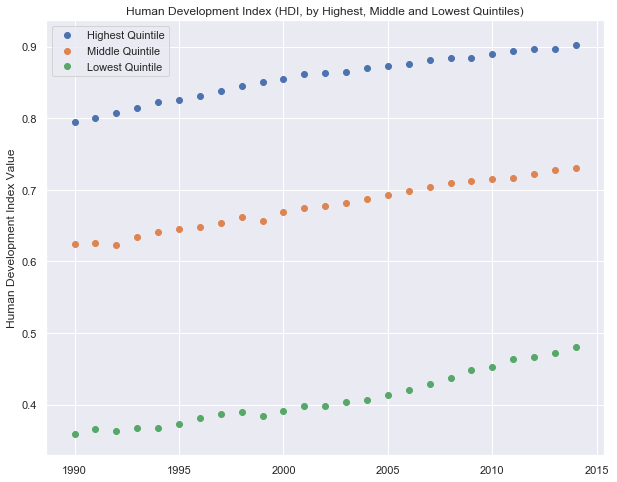

In [31]:
fig, axes = plt.subplots(figsize=(10,8))
plt.scatter(men_quintile_5.index, men_quintile_5['HDIvalue'])
plt.scatter(men_quintile_3.index, men_quintile_3['HDIvalue'])
plt.scatter(men_quintile_1.index, men_quintile_1['HDIvalue'])
plt.legend(["Highest Quintile", "Middle Quintile", "Lowest Quintile"])
plt.ylabel(f"Human Development Index Value") 
plt.title(f"Human Development Index (HDI, by Highest, Middle and Lowest Quintiles)");

## Question 1 - How has the prevalence of diabetes changed over time?

- The prevalence of diabetes is increasing in the lowest and middle quintiles for men and women
- In the highest quintile the increase in diabetes prevalence has slowed for men and is flat for women
- The nations with the highest rates (>20%) seem to be clustered in Polynesia


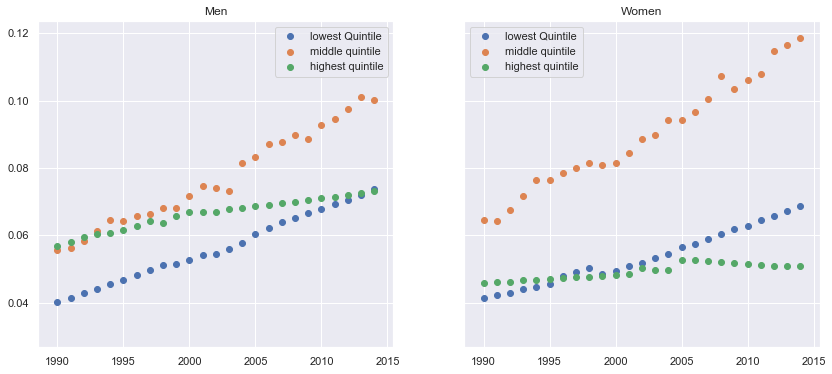

In [32]:
fig1, (axes1a,axes1b) = plt.subplots(1,2,figsize=(14,6),sharey=True)

axes1a.scatter(men_quintile_1.index, men_quintile_1['Age-standardised diabetes prevalence'])
axes1a.scatter(men_quintile_3.index, men_quintile_3['Age-standardised diabetes prevalence'])
axes1a.scatter(men_quintile_5.index, men_quintile_5['Age-standardised diabetes prevalence'])
axes1a.legend(["lowest Quintile", "middle quintile", "highest quintile"])
axes1a.set_title('Men')

axes1b.scatter(women_quintile_1.index, women_quintile_1['Age-standardised diabetes prevalence'])
axes1b.scatter(women_quintile_3.index, women_quintile_3['Age-standardised diabetes prevalence'])
axes1b.scatter(women_quintile_5.index, women_quintile_5['Age-standardised diabetes prevalence'])
axes1b.legend(["lowest Quintile", "middle quintile", "highest quintile"])
axes1b.set_title('Women');

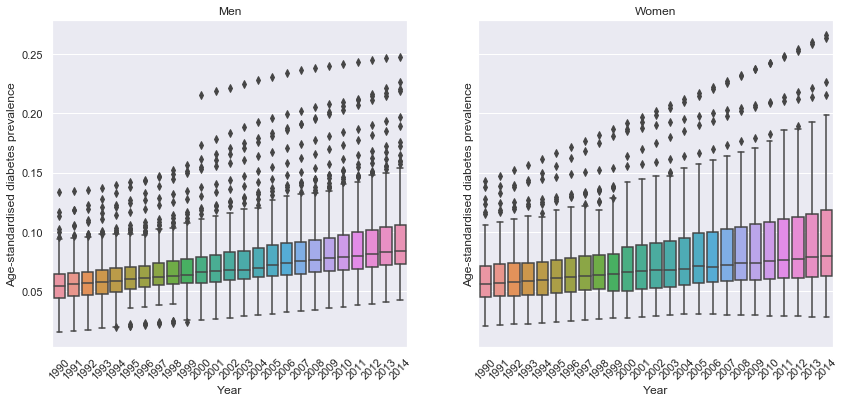

In [33]:
fig2, (axes2a, axes2b) = plt.subplots(1,2,figsize=(14,6),sharey=True)
m=sns.boxplot(ax=axes2a,x=no_nan_men['Year'],y=no_nan_men['Age-standardised diabetes prevalence'],orient='v')
m.set_xticklabels(m.get_xticklabels(),rotation=45)
m.set_ylabel(f"Age-standardised diabetes prevalence")
m.set_title(f"Men")

w=sns.boxplot(ax=axes2b,x=no_nan_women['Year'],y=no_nan_women['Age-standardised diabetes prevalence'],orient='v')
w.set_xticklabels(w.get_xticklabels(),rotation=45)
w.set_ylabel(f"Age-standardised diabetes prevalence")
w.set_title(f"Women");

In [34]:
high_DM = no_nan_men.loc[no_nan_men['Age-standardised diabetes prevalence'] > 0.21]
high_DM.groupby('Country')['Country'].count()

Country
Kiribati     4
Palau       15
Samoa        4
Tonga        3
Name: Country, dtype: int64

In [35]:
high_DM = no_nan_women.loc[no_nan_women['Age-standardised diabetes prevalence'] > 0.21]
high_DM.groupby('Country')['Country'].count()

Country
Kiribati     4
Palau        4
Samoa       10
Tonga       11
Name: Country, dtype: int64

## Question 2 - How does the introduction of mobile phones compare with the prevalence of diabetes?

> Mobile cellular subscriptions (per 100 people)

>Mobile cellular telephone subscriptions are subscriptions to a public mobile telephone service that provide access to the PSTN using cellular technology. The indicator includes (and is split into) the number of postpaid subscriptions, and the number of active prepaid accounts (i.e. that have been used during the last three months). The indicator applies to all mobile cellular subscriptions that offer voice communications. It excludes subscriptions via data cards or USB modems, subscriptions to public mobile data services, private trunked mobile radio, telepoint, radio paging and telemetry services.

>ID: IT.CEL.SETS.P2
    
>Source: International Telecommunication Union, World Telecommunication/ICT Development Report and database.
    License:  CC BY-4.0 
    
- Mobile phone adoption began in the early nineties for the highest quintile and increased in an exponential fashion.  The middle quintile begins to increase in the late nineties and also follows an exponential pattern.  Increases in the lowest quintile began in 2005 and has increased linearly. 

- Diabetes prevalence in the highest quintile did not change with increased mobile subscriptions.  The lowest and middle quintiles do change with increased subscriptions.  This would indicate that social and technological changes do play a part in the spread of diabetes. 

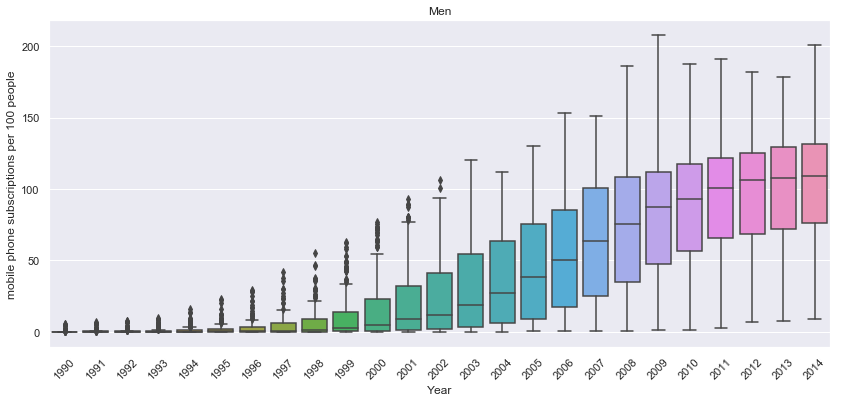

In [36]:
fig2, (axes2a) = plt.subplots(1,1,figsize=(14,6),sharey=True)
m=sns.boxplot(ax=axes2a,x=no_nan_men['Year'],y=no_nan_men['IT.CEL.SETS.P2'],orient='v')
m.set_xticklabels(m.get_xticklabels(),rotation=45)
m.set_ylabel(f"{titles['IT.CEL.SETS.P2']}")
m.set_title("Men");


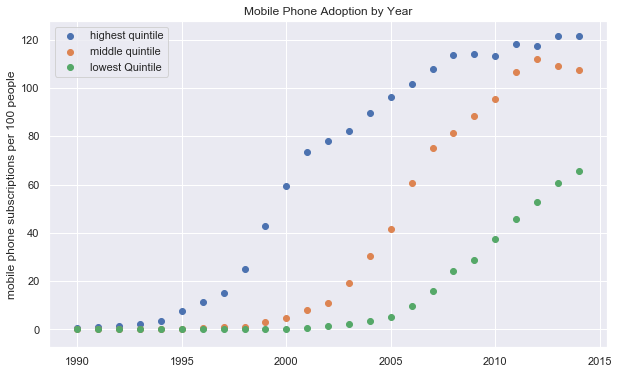

In [37]:
fig1, axes1a = plt.subplots(figsize=(10,6))

axes1a.scatter(men_quintile_5.index, men_quintile_5['IT.CEL.SETS.P2'])
axes1a.scatter(men_quintile_3.index, men_quintile_3['IT.CEL.SETS.P2'])
axes1a.scatter(men_quintile_1.index, men_quintile_1['IT.CEL.SETS.P2'])
axes1a.legend(["highest quintile", "middle quintile", "lowest Quintile"])
axes1a.set_ylabel(f"{titles['IT.CEL.SETS.P2']}")
axes1a.set_title('Mobile Phone Adoption by Year');

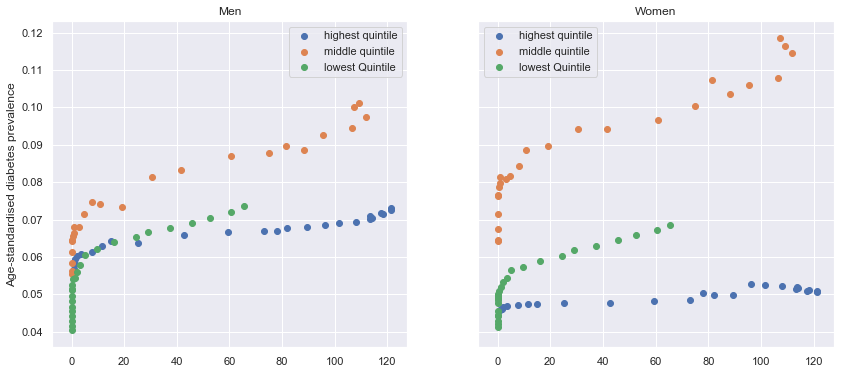

In [38]:
fig1, (axes1a,axes1b) = plt.subplots(1,2,figsize=(14,6),sharey=True)

axes1a.scatter(men_quintile_5['IT.CEL.SETS.P2'], men_quintile_5['Age-standardised diabetes prevalence'])
axes1a.scatter(men_quintile_3['IT.CEL.SETS.P2'], men_quintile_3['Age-standardised diabetes prevalence'])
axes1a.scatter(men_quintile_1['IT.CEL.SETS.P2'], men_quintile_1['Age-standardised diabetes prevalence'])
axes1a.legend(["highest quintile", "middle quintile", "lowest Quintile"])
axes1a.set_ylabel('Age-standardised diabetes prevalence')
axes1a.set_title('Men')

axes1b.scatter(women_quintile_5['IT.CEL.SETS.P2'], women_quintile_5['Age-standardised diabetes prevalence'])
axes1b.scatter(women_quintile_3['IT.CEL.SETS.P2'], women_quintile_3['Age-standardised diabetes prevalence'])
axes1b.scatter(women_quintile_1['IT.CEL.SETS.P2'], women_quintile_1['Age-standardised diabetes prevalence'])
axes1b.legend(["highest quintile", "middle quintile", "lowest Quintile"])
axes1b.set_title('Women');

## Question 3 - How does the availability of electricity compare with the prevalence of diabetes?


>Access to electricity is the percentage of population with access to electricity. Electrification data are collected from industry, national surveys and international sources.

>ID: EG.ELC.ACCS.ZS
    
>Source: World Bank, Sustainable Energy for All ( SE4ALL ) database from the SE4ALL Global Tracking Framework led jointly by the World Bank, International Energy Agency, and the Energy Sector Management Assistance Program.
    
>License:  CC BY-4.0 

We used the logarithm scale against the age-standardized diabetes prevalence so we can really see the pattern that is consistent with the previous patterns. What we see here is that in the high quintile for both men and women who have 100% access to electricity in their countries have a stable prevalence of diabetes between 0.058 to 0.077 for men and 0.042 to 0.05 for women.  The middle quintile is similar, with the prevalence of diabetes between 0.057 to 0.101 for men and between 0.062 to 0.12 for women both having about 97-100% access to electricity in their countries. The lower quintile however is quite different as they have way less access to electricity in their countries and we can see that the prevalence of diabetes increases over time as they have more access to electricity.

The boxplot shows the all countries percentage access to electricity for both men and women from 1990 to 2014. The pattern is the same for both.  We can also see that the mean also increases over time.

In conclusion, there is a correlation between the access to electricity in various countries to the prevalence of diabetes.



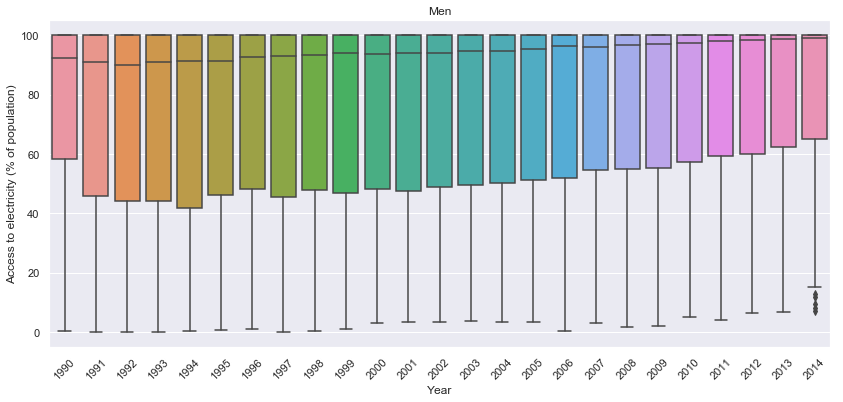

In [39]:
fig2, (axes2a) = plt.subplots(1,1,figsize=(14,6),sharey=True)
m=sns.boxplot(ax=axes2a,x=no_nan_men['Year'],y=no_nan_men['EG.ELC.ACCS.ZS'],orient='v')
m.set_xticklabels(m.get_xticklabels(),rotation=45)
m.set_ylabel(f"{titles['EG.ELC.ACCS.ZS']}")
m.set_title("Men");


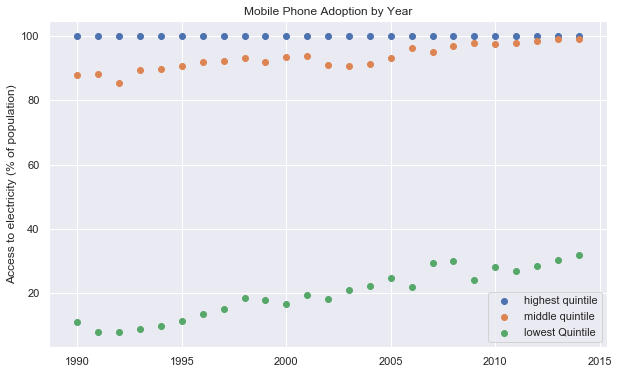

In [40]:
fig1, axes1a = plt.subplots(figsize=(10,6))

axes1a.scatter(men_quintile_5.index, men_quintile_5['EG.ELC.ACCS.ZS'])
axes1a.scatter(men_quintile_3.index, men_quintile_3['EG.ELC.ACCS.ZS'])
axes1a.scatter(men_quintile_1.index, men_quintile_1['EG.ELC.ACCS.ZS'])
axes1a.legend(["highest quintile", "middle quintile", "lowest Quintile"])
axes1a.set_ylabel(f"{titles['EG.ELC.ACCS.ZS']}")
axes1a.set_title('Mobile Phone Adoption by Year');

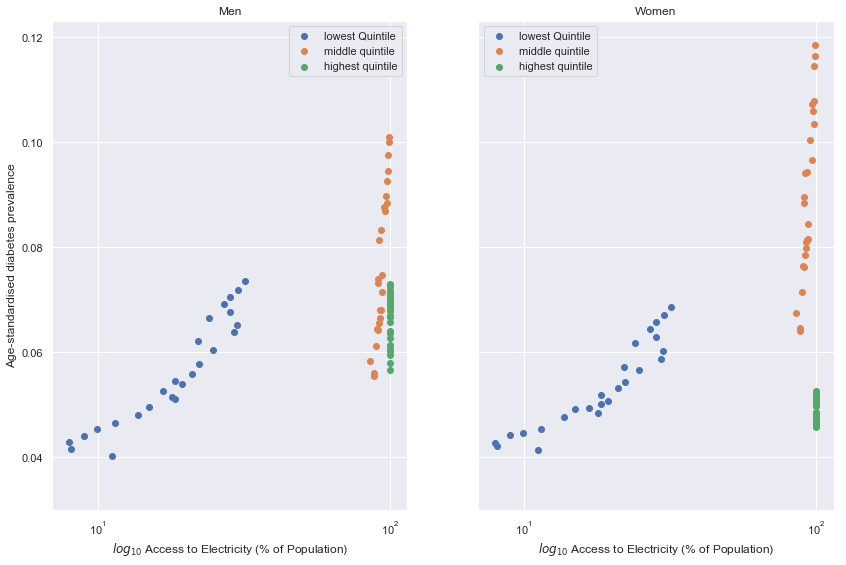

In [41]:
fig1, (axes2a,axes2b) = plt.subplots(1,2,figsize=(14,9),sharey=True)

axes2a.scatter(men_quintile_1['EG.ELC.ACCS.ZS'], men_quintile_1['Age-standardised diabetes prevalence'])
axes2a.scatter(men_quintile_3['EG.ELC.ACCS.ZS'], men_quintile_3['Age-standardised diabetes prevalence'])
axes2a.scatter(men_quintile_5['EG.ELC.ACCS.ZS'], men_quintile_5['Age-standardised diabetes prevalence'])
axes2a.legend(["lowest Quintile", "middle quintile", "highest quintile"])
axes2a.semilogx()
axes2a.set_ylabel('Age-standardised diabetes prevalence')
axes2a.set_xlabel(r'$log_{10}$ Access to Electricity (% of Population)')
axes2a.set_title('Men')

axes2b.scatter(women_quintile_1['EG.ELC.ACCS.ZS'], women_quintile_1['Age-standardised diabetes prevalence'])
axes2b.scatter(women_quintile_3['EG.ELC.ACCS.ZS'], women_quintile_3['Age-standardised diabetes prevalence'])
axes2b.scatter(women_quintile_5['EG.ELC.ACCS.ZS'], women_quintile_5['Age-standardised diabetes prevalence'])
axes2b.legend(["lowest Quintile", "middle quintile", "highest quintile"])
axes2b.semilogx()
axes2b.set_xlabel(r'$log_{10}$ Access to Electricity (% of Population)')
axes2b.set_title('Women');

## Question 4 - How does diabetes compare with governance?

> CPIA property rights and rule-based governance rating (1=low to 6=high)

>Property rights and rule-based governance assess the extent to which private economic activity is facilitated by an effective legal system and rule-based governance structure in which property and contract rights are reliably respected and enforced.

>    ID: IQ.CPA.PROP.XQ

>    Source: [World Bank Group, CPIA database]( worldbank.org/ida ).


In [42]:
all_data_men['IQ.CPA.PROP.XQ'] = all_data_men['IQ.CPA.PROP.XQ'].apply(str)
all_data_women['IQ.CPA.PROP.XQ'] = all_data_women['IQ.CPA.PROP.XQ'].apply(str)

In [43]:
gov_nan_men = all_data_men.loc[all_data_men['IQ.CPA.PROP.XQ'] != 'nan']
gov_nan_women = all_data_women.loc[all_data_women['IQ.CPA.PROP.XQ'] != 'nan']

In [44]:
gov_nan_men = gov_nan_men.set_index('Year')
gov_nan_women = gov_nan_women.set_index('Year')

In [45]:
men_score_1 = gov_nan_men.groupby(['IQ.CPA.PROP.XQ']).get_group('1.0')
men_score_15 = gov_nan_men.groupby(['IQ.CPA.PROP.XQ']).get_group('1.5')
men_score_2 = gov_nan_men.groupby(['IQ.CPA.PROP.XQ']).get_group('2.0')
men_score_25 = gov_nan_men.groupby(['IQ.CPA.PROP.XQ']).get_group('2.5')
men_score_3 = gov_nan_men.groupby(['IQ.CPA.PROP.XQ']).get_group('3.0')
men_score_35 = gov_nan_men.groupby(['IQ.CPA.PROP.XQ']).get_group('3.5')
men_score_4 = gov_nan_men.groupby(['IQ.CPA.PROP.XQ']).get_group('4.0')

women_score_1 = gov_nan_women.groupby(['IQ.CPA.PROP.XQ']).get_group('1.0')
women_score_15 = gov_nan_women.groupby(['IQ.CPA.PROP.XQ']).get_group('1.5')
women_score_2 = gov_nan_women.groupby(['IQ.CPA.PROP.XQ']).get_group('2.0')
women_score_25 = gov_nan_women.groupby(['IQ.CPA.PROP.XQ']).get_group('2.5')
women_score_3 = gov_nan_women.groupby(['IQ.CPA.PROP.XQ']).get_group('3.0')
women_score_35 = gov_nan_women.groupby(['IQ.CPA.PROP.XQ']).get_group('3.5')
women_score_4 = gov_nan_women.groupby(['IQ.CPA.PROP.XQ']).get_group('4.0')

In [46]:
men1  = men_score_1.groupby(['Year']).median()
men15 = men_score_15.groupby(['Year']).median()
men2  = men_score_2.groupby(['Year']).median()
men25 = men_score_25.groupby(['Year']).median()
men3  = men_score_3.groupby(['Year']).median()
men35 = men_score_35.groupby(['Year']).median()
men4  = men_score_4.groupby(['Year']).median()

women1  = women_score_1.groupby(['Year']).median()
women15 = women_score_15.groupby(['Year']).median()
women2  = women_score_2.groupby(['Year']).median()
women25 = women_score_25.groupby(['Year']).median()
women3  = women_score_3.groupby(['Year']).median()
women35 = women_score_35.groupby(['Year']).median()
women4  = women_score_4.groupby(['Year']).median()

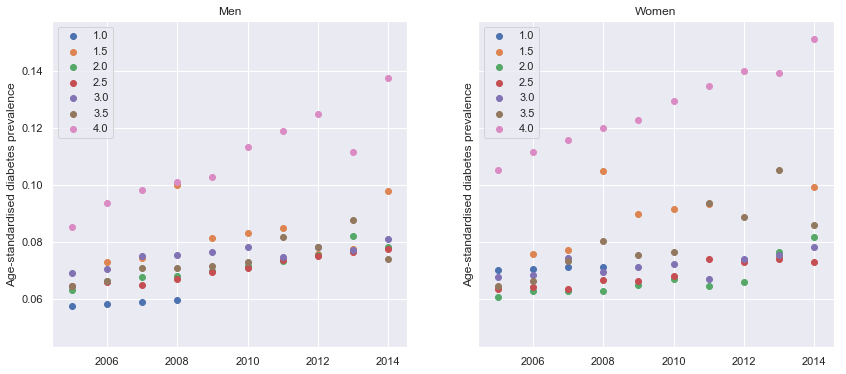

In [47]:
fig2, (axes3a, axes3b) = plt.subplots(1,2,figsize=(14,6),sharey=True)

axes3a.scatter(men1.index, men1['Age-standardised diabetes prevalence'])
axes3a.scatter(men15.index, men15['Age-standardised diabetes prevalence'])
axes3a.scatter(men2.index, men2['Age-standardised diabetes prevalence'])
axes3a.scatter(men25.index, men25['Age-standardised diabetes prevalence'])
axes3a.scatter(men3.index, men3['Age-standardised diabetes prevalence'])
axes3a.scatter(men35.index, men35['Age-standardised diabetes prevalence'])
axes3a.scatter(men4.index, men4['Age-standardised diabetes prevalence'])
axes3a.legend(["1.0", "1.5", "2.0","2.5","3.0","3.5","4.0"])
axes3a.set_ylabel('Age-standardised diabetes prevalence')
axes3a.set_title('Men')

axes3b.scatter(women1.index, women1['Age-standardised diabetes prevalence'])
axes3b.scatter(women15.index, women15['Age-standardised diabetes prevalence'])
axes3b.scatter(women2.index, women2['Age-standardised diabetes prevalence'])
axes3b.scatter(women25.index, women25['Age-standardised diabetes prevalence'])
axes3b.scatter(women3.index, women3['Age-standardised diabetes prevalence'])
axes3b.scatter(women35.index, women35['Age-standardised diabetes prevalence'])
axes3b.scatter(women4.index, women4['Age-standardised diabetes prevalence'])
axes3b.legend(["1.0", "1.5", "2.0","2.5","3.0","3.5","4.0"])
axes3b.set_ylabel('Age-standardised diabetes prevalence')
axes3b.set_title('Women');


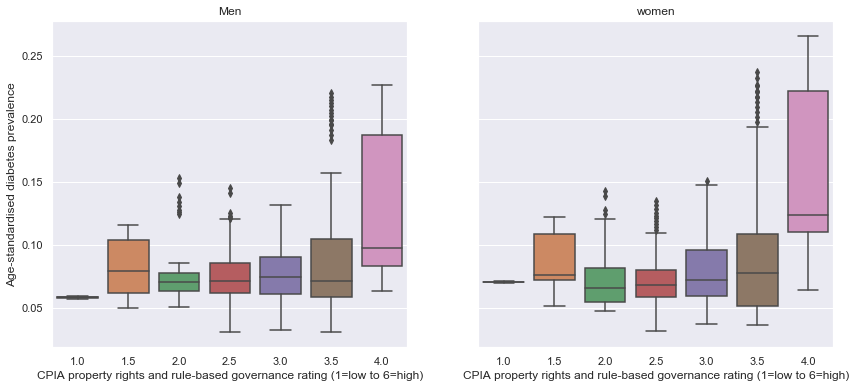

In [51]:
fig, (axes4a,axes4b) = plt.subplots(1,2,figsize=(14,6),sharey=True)
m=sns.boxplot(ax=axes4a,x="IQ.CPA.PROP.XQ", y="Age-standardised diabetes prevalence", data=no_nan_men)
m.set_title("Men")
m.set_xlabel(f"{titles['IQ.CPA.PROP.XQ']}")
    
w=sns.boxplot(ax=axes4b,x="IQ.CPA.PROP.XQ", y="Age-standardised diabetes prevalence", data=no_nan_women);
w.set_ylabel('')
w.set_xlabel(f"{titles['IQ.CPA.PROP.XQ']}")
w.set_title("women");